In [1]:
#  import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# define variables
immo_vis_dir = "../../data/immo_vis/"
parquet_extension = ".parquet"
csv_extension = ".csv"
metropole_appartement_file = "ventes-metropole-appartement" + parquet_extension
metropole_maison_file = "ventes-metropole-maison" + parquet_extension
metropole_appartement_file_cleaned = metropole_appartement_file + "_step1_clean_" + parquet_extension

metropole_appartement_code_iris = 'appartement_prix_groupedby_codeiris' + csv_extension

#  Set plot options
LargePlotActive = False
MediumPlotActive = False
SmallPlotActive = False
HeatMapDisplay = False



# # functions

In [2]:
# functions  

import time

def print_numerical_isna(df) :
    columns = df.select_dtypes(include='number').columns.tolist()
    print (df[columns].isna().sum())

def print_categorial_isna(df) :
    columns = df.select_dtypes(include='category').columns.tolist()
    print (df[columns].isna().sum())     

def load_appartement_file (filename) :
    start_path = Path(immo_vis_dir)
    final_path = start_path / filename
    return pd.read_parquet(final_path.as_posix())

def save_appartement_file (df, filename) :
    start_path = Path(immo_vis_dir)
    final_path = start_path / filename
    df.to_parquet(path=final_path.as_posix(),index=True)

def get_numerical_column_names (df) :
    return [ column for column  in df.columns if df[column].dtype not in ["object","category"]]


def apply_preprocessing  (df) :
    y_tmp =df['prix_bien']
    X_tmp =df.drop(columns=['prix_m2_vente','prix_bien','mapCoordonneesLatitude','mapCoordonneesLongitude','date',"expo_double"])
    return X_tmp,y_tmp



# # decode file and display infos

In [3]:
# import appartement file

df = load_appartement_file(metropole_appartement_file_cleaned)
nb_rows= df.shape[0]
nb_cols= df.shape[1]

In [4]:
#  print main infos on appartmeent file

print ( f" {metropole_appartement_file_cleaned} rows {nb_rows} columns {nb_cols}")
print (df.info())



 ventes-metropole-appartement.parquet_step1_clean_.parquet rows 2077476 columns 48
<class 'pandas.core.frame.DataFrame'>
Index: 2077476 entries, immo-facile-57743459 to 134327817
Data columns (total 48 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   etage                    int64         
 1   surface                  int64         
 2   nb_pieces                int64         
 3   prix_bien                int64         
 4   balcon                   int64         
 5   eau                      int64         
 6   bain                     int64         
 7   mapCoordonneesLatitude   float64       
 8   mapCoordonneesLongitude  float64       
 9   annonce_exclusive        int64         
 10  nb_etages                float64       
 11  places_parking           float64       
 12  cave                     int64         
 13  annee_construction       float64       
 14  nb_toilettes             int64         
 15  nb_terraces       

# Analys Iris Code


CODE_IRIS
340030201    5246
660170000    2618
60882203     2326
341721804    2204
60290117     1893
             ... 
840470000       1
840980000       1
840400000       1
841400000       1
840750000       1
Name: count, Length: 23997, dtype: int64
IRIS code numbers 23997
IRIS isna 0
quantile prix_m2_vente appartement 
 0.10     1873.0900
0.25     2786.8900
0.50     4074.0700
0.75     5844.1600
0.90     8750.0000
0.95    10909.0900
0.99    14579.0725
Name: prix_m2_vente, dtype: float64


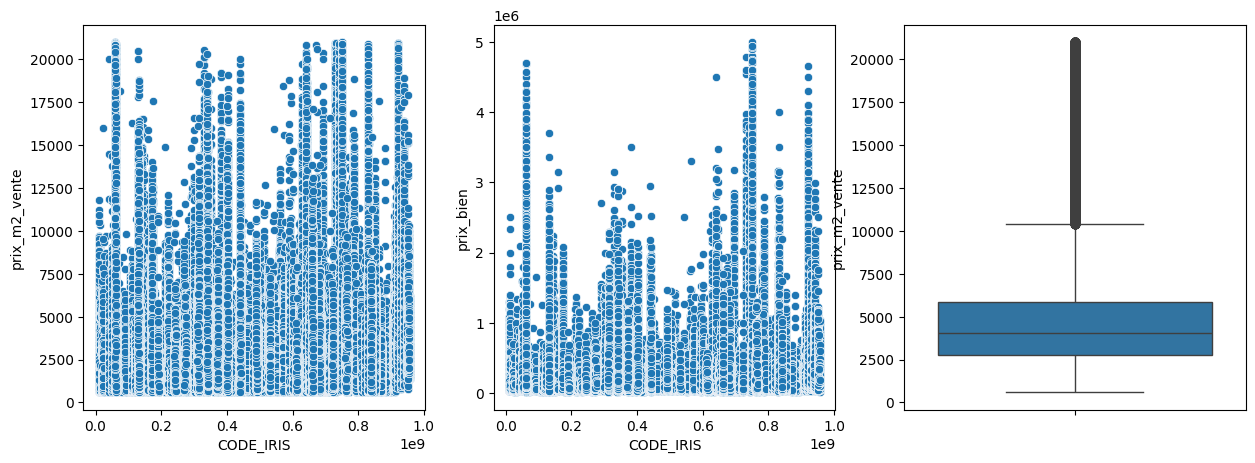

In [9]:
# check dtypes
import seaborn as sns
import matplotlib.pyplot as plt
print (df.CODE_IRIS.value_counts(dropna=False))
print ("IRIS code numbers", len(df.CODE_IRIS.unique()))

print ("IRIS isna", df.CODE_IRIS.isna().sum())

print("quantile prix_m2_vente appartement \n",df["prix_m2_vente"].quantile([.1, .25, .5, .75, .90,.95,.99]))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axes[0],x=df.CODE_IRIS,y=df.prix_m2_vente)
sns.scatterplot(ax=axes[1],x=df.CODE_IRIS,y=df.prix_bien)
sns.boxplot(ax=axes[2],y=df.prix_m2_vente)

plt.show()

In [10]:
results = df.groupby(["CODE_IRIS"]).agg(
prix_bien_median=("prix_bien","median"),
prix_bien_moyen=("prix_bien","mean"),
prix_m2_vente_median=("prix_m2_vente","median"),
prix_m2_vente_moyen=("prix_m2_vente","mean")
).sort_values(by="prix_m2_vente_moyen", ascending=False)

start_path = Path(immo_vis_dir)
final_path = start_path / metropole_appartement_code_iris

print (results)

results.reset_index().to_csv(final_path.as_posix())

df1 = pd.read_csv(final_path.as_posix())

display(df1.head(10))



           prix_bien_median  prix_bien_moyen  prix_m2_vente_median  \
CODE_IRIS                                                            
60760000          2700000.0     2.700000e+06              19852.94   
595790000         1521245.0     1.521245e+06              17485.57   
751062199          905000.0     1.182865e+06              17272.73   
751072599          995000.0     1.217380e+06              17500.00   
751062401          750000.0     9.209902e+05              17307.69   
...                     ...              ...                   ...   
431860000           27000.0     2.700000e+04                600.00   
113460000           73000.0     7.300000e+04                598.36   
211640000           98000.0     9.800000e+04                597.56   
582670000           53600.0     5.360000e+04                595.56   
691350000           50000.0     5.000000e+04                595.24   

           prix_m2_vente_moyen  
CODE_IRIS                       
60760000          19852

,Unnamed: 0,CODE_IRIS,prix_bien_median,prix_bien_moyen,prix_m2_vente_median,prix_m2_vente_moyen
0,0,60760000,2700000.0,2.700000e+06,19852.940,19852.940000
1,1,595790000,1521245.0,1.521245e+06,17485.570,17485.570000
2,2,751062199,905000.0,1.182865e+06,17272.730,17010.765294
3,3,751072599,995000.0,1.217380e+06,17500.000,16941.720476
4,4,751062401,750000.0,9.209902e+05,17307.690,16915.487970
5,5,751062402,697500.0,8.790428e+05,16749.755,16909.609860
6,6,751072505,743600.0,1.123283e+06,16918.030,16881.550824
7,7,751072507,1462500.0,1.543408e+06,16929.420,16814.727500
8,8,751072506,927500.0,1.191078e+06,17118.055,16784.943333
9,9,751062205,710000.0,9.763175e+05,16701.755,16724.703366


# # Preprocessing